`mamba update cmip6_preprocessing -y` in terminal

In [1]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
#import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
warnings.filterwarnings("ignore")
from cmip6_preprocessing.postprocessing import combine_datasets

In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [3]:
def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

Here's the subset of models, using historical experients with native gridding with Omon freq<br>
['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5','CESM2-WACCM-FV2', 'CESM2-FV2']

## Salinity

In [4]:
cat_so = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'so', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd_so_og = cat_so.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

dd_so = combine_datasets(
    dd_so_og,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


`from cmip6_preprocessing.postprocessing import combine_datasets`

`def pick_first_member(ds_list, **kwargs):`
    `return ds_list[0]`

`dd_so_new = combine_datasets(`
    `dd_so,`
    `pick_first_member,`
   ` match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])`


In [26]:
for name, ds in dd_so.items():
    print(ds.attrs['source_id']+' ' +ds.attrs['variant_label']+' ' +ds.attrs['table_id'])

CanESM5 r3i1p1f1 Omon
CNRM-ESM2-1 r3i1p1f2 Omon
MPI-ESM1-2-LR r9i1p1f1 Omon
GISS-E2-1-G r6i1p1f1 Omon
IPSL-CM6A-LR r28i1p1f1 Omon
MIROC-ES2L r7i1p1f2 Omon
MPI-ESM1-2-HR r3i1p1f1 Omon
ACCESS-ESM1-5 r5i1p1f1 Omon
UKESM1-0-LL r6i1p1f3 Omon
CanESM5-CanOE r3i1p2f1 Omon
CESM2 r2i1p1f1 Omon
MPI-ESM-1-2-HAM r2i1p1f1 Omon
CESM2-WACCM-FV2 r1i1p1f1 Omon
CESM2-FV2 r1i1p1f1 Omon
CESM2-WACCM r2i1p1f1 Omon
GISS-E2-1-G-CC r1i1p1f1 Omon


In [31]:
# dd_so['GISS-E2-1-G-CC.gn.historical.Omon']
# dd_so['MPI-ESM1-2-HR.gn.historical.Omon']
dd_so_og['CMIP.MPI-M.MPI-ESM1-2-LR.historical.r1i1p1f1.Omon.so.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Omon/so/gn/v20190710/.nan.20190710']

<xarray.Dataset>
Dimensions:        (bnds: 2, lev: 40, time: 1980, vertex: 4, x: 256, y: 220)
Coordinates:
  * x              (x) int32 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
  * y              (y) int32 0 1 2 3 4 5 6 7 ... 212 213 214 215 216 217 218 219
    lat            (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
  * lev            (lev) float64 6.0 17.0 27.0 ... 4.67e+03 5.17e+03 5.72e+03
    lev_bounds     (lev, bnds) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    lon            (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
  * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat_verticies  (y, x, vertex) float64 dask.array<chunksize=(220, 256, 4), meta=np.ndarray>
    lon_verticies  (y, x, vertex) float64 dask.array<chunksize=(220, 256, 4), meta=np.ndarray>
  * bnds           (bnds) int64 0 1
  * vertex         (vertex) int64 0 1 2 3
    lon_bounds     (bnds, y, x) float64 dask.array<chunksize=(1, 220, 256), meta=np.ndarray>
    lat_bounds     (bnds, y, x) float64 dask.array<chunksize=(1, 220, 256), meta=np.ndarray>
Data variables:
    so             (time, lev, y, x) float32 dask.array<chunksize=(18, 40, 220, 256), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   0.0
    cmor_version:            3.5.0
    contact:                 cmip6-mpi-esm@dkrz.de
    creation_date:           2019-09-11T14:21:43Z
    data_specs_version:      01.00.30
    experiment:              all-forcing simulation of the recent past
    experiment_id:           historical
    external_variables:      areacello volcello
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-E...
    grid:                    gn
    grid_label:              gn
    history:                 2019-09-11T14:21:43Z ; CMOR rewrote data to be c...
    initialization_index:    1
    institution:             Max Planck Institute for Meteorology, Hamburg 20...
    institution_id:          MPI-M
    license:                 CMIP6 model data produced by MPI-M is licensed u...
    mip_era:                 CMIP6
    nominal_resolution:      250 km
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl
    parent_mip_era:          CMIP6
    parent_source_id:        MPI-ESM1-2-LR
    parent_time_units:       days since 1850-1-1 00:00:00
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    project_id:              CMIP6
    realization_index:       1
    realm:                   ocean
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    source:                  MPI-ESM1.2-LR (2017): \naerosol: none, prescribe...
    source_id:               MPI-ESM1-2-LR
    source_type:             AOGCM
    status:                  2020-03-31;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Omon
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    title:                   MPI-ESM1-2-LR output prepared for CMIP6
    tracking_id:             hdl:21.14100/da3c29fa-a5ab-45b6-afa4-19cc1b1c5ed...
    variable_id:             so
    variant_label:           r1i1p1f1
    netcdf_tracking_ids:     hdl:21.14100/da3c29fa-a5ab-45b6-afa4-19cc1b1c5ed...
    version_id:              v20190710
    intake_esm_varname:      None
    intake_esm_dataset_key:  CMIP.MPI-M.MPI-ESM1-2-LR.historical.r1i1p1f1.Omo...
    original_key:            CMIP.MPI-M.MPI-ESM1-2-LR.historical.r1i1p1f1.Omo...

IndexError: index 16 is out of bounds for axis 0 with size 16

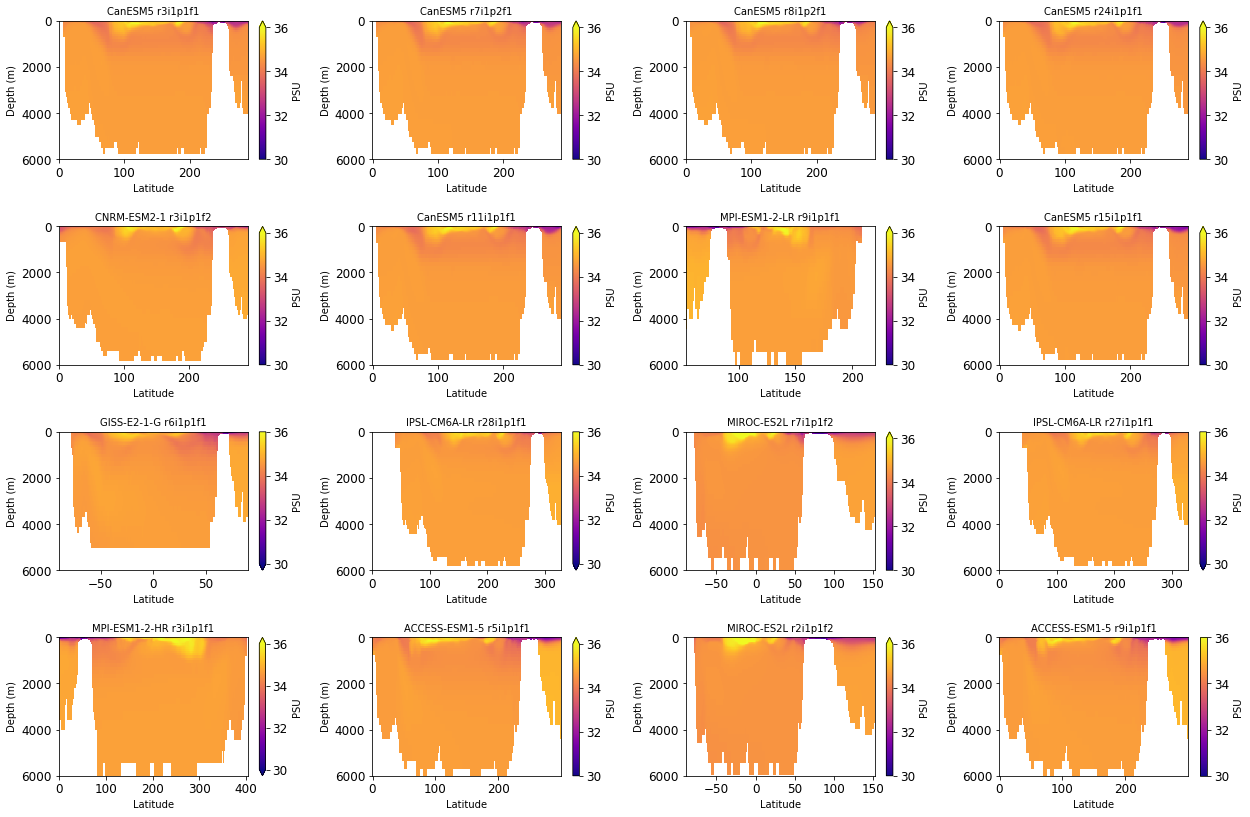

In [19]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_so, axarr_so = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_so.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_so_og.items():
#     print(ds)
    ax = axarr_so.flat[ax_idx]
    so_section = ds.so.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = so_section.plot(x='y', y='lev', yincrease=False, cmap = 'plasma', vmin=30, vmax=36, ax = ax, cbar_kwargs={'label':'PSU'})
    ax.set_title(ds.attrs['source_id']+ ' '+ds.attrs['variant_label'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
    #ax.set_xlim([-90, 90])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

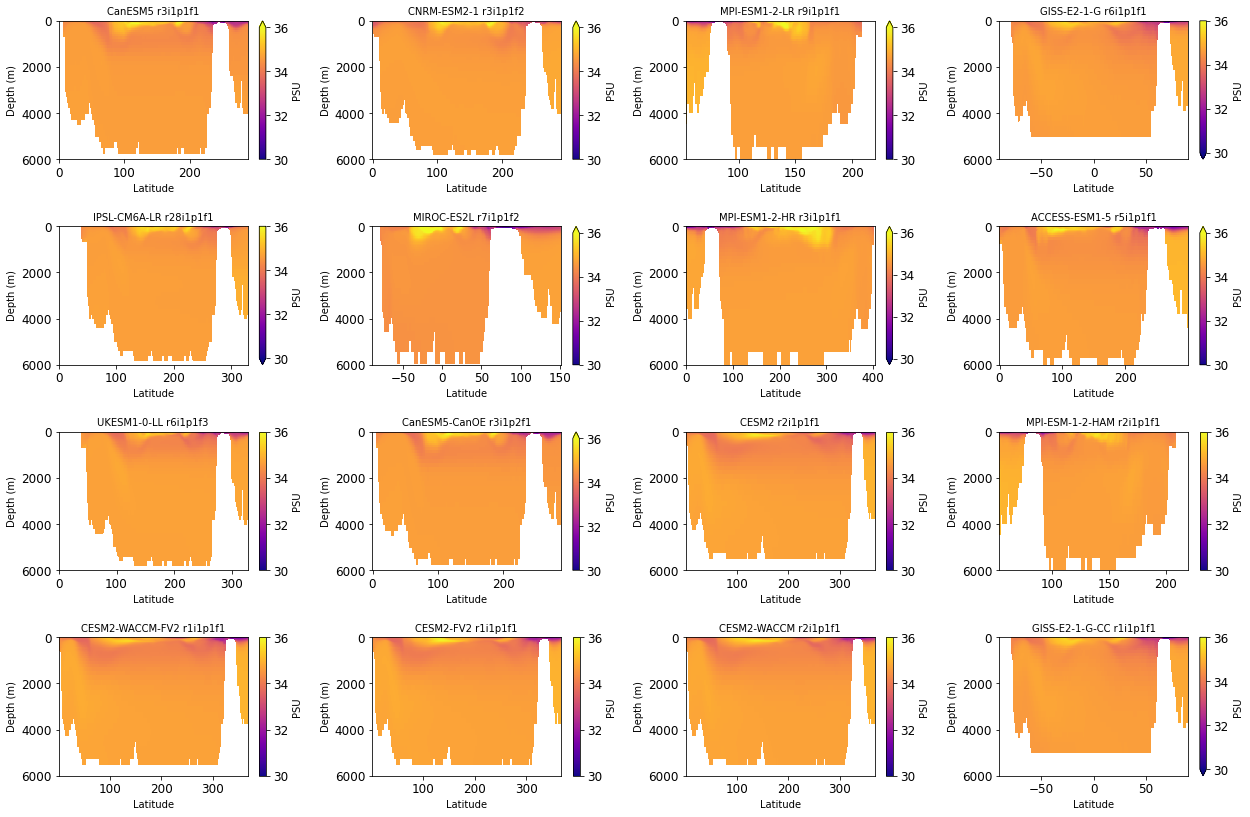

In [9]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_so2, axarr_so2 = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_so2.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_so.items():
#     print(ds)
    ax = axarr_so2.flat[ax_idx]
    so_section2 = ds.so.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = so_section2.plot(x='y', y='lev', yincrease=False, cmap = 'plasma', vmin=30, vmax=36, ax = ax, cbar_kwargs={'label':'PSU'})
    ax.set_title(ds.attrs['source_id']+ ' '+ds.attrs['variant_label'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
    #ax.set_xlim([-90, 90])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

## Thetao

In [20]:
cat_thetao = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'thetao', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd_thetao_og = cat_thetao.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

dd_thetao = combine_datasets(
    dd_thetao_og,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


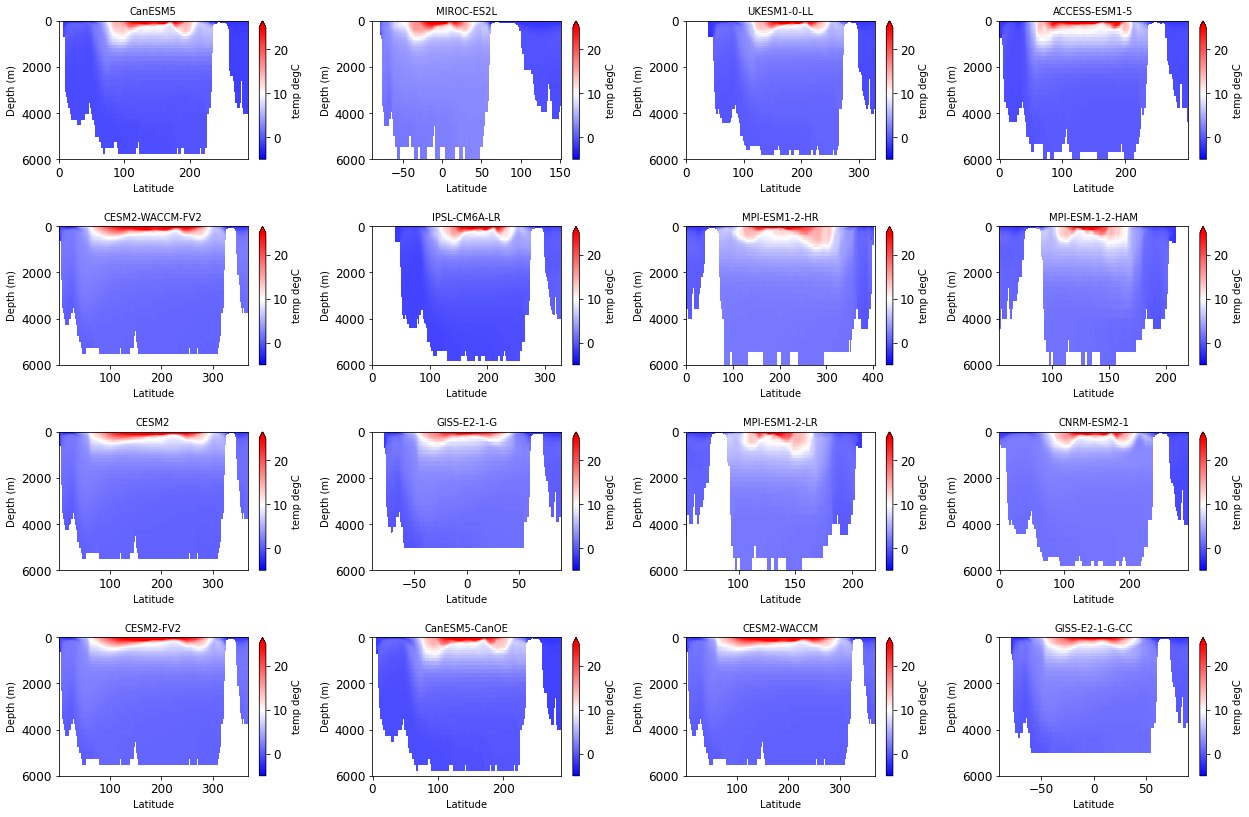

In [21]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_thetao, axarr_thetao = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_thetao.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_thetao.items():
#     print(ds)
    ax = axarr_thetao.flat[ax_idx]
    thetao_section = ds.thetao.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = thetao_section.plot(x='y', y='lev', yincrease=False, cmap = 'bwr', vmin = -5, vmax = 25, ax = ax, cbar_kwargs={'label':'temp degC'})
    ax.set_title(ds.attrs['source_id'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

## Dissic

In [33]:
cat_dissic = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'dissic', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd_dissic = cat_dissic.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

# dd_dissic = combine_datasets(
#     dd_dissic_og,
#     pick_first_member,
#     match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [34]:
dd_dissic

{'CMIP.CCCma.CanESM5.historical.r30i1p2f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical/r30i1p2f1/Omon/dissic/gn/v20190429/.nan.20190429': <xarray.Dataset>
 Dimensions:        (bnds: 2, lev: 45, time: 1980, vertex: 4, x: 360, y: 291)
 Coordinates:
   * x              (x) int32 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
   * y              (y) int32 0 1 2 3 4 5 6 7 ... 283 284 285 286 287 288 289 290
     lat            (y, x) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
   * lev            (lev) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
     lev_bounds     (lev, bnds) float64 dask.array<chunksize=(45, 2), meta=np.ndarray>
     lon            (y, x) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
   * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
     time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
     lat_verticies  (y, x, vertex) float64 dask.array<chunksize=(291, 36

IndexError: index 16 is out of bounds for axis 0 with size 16

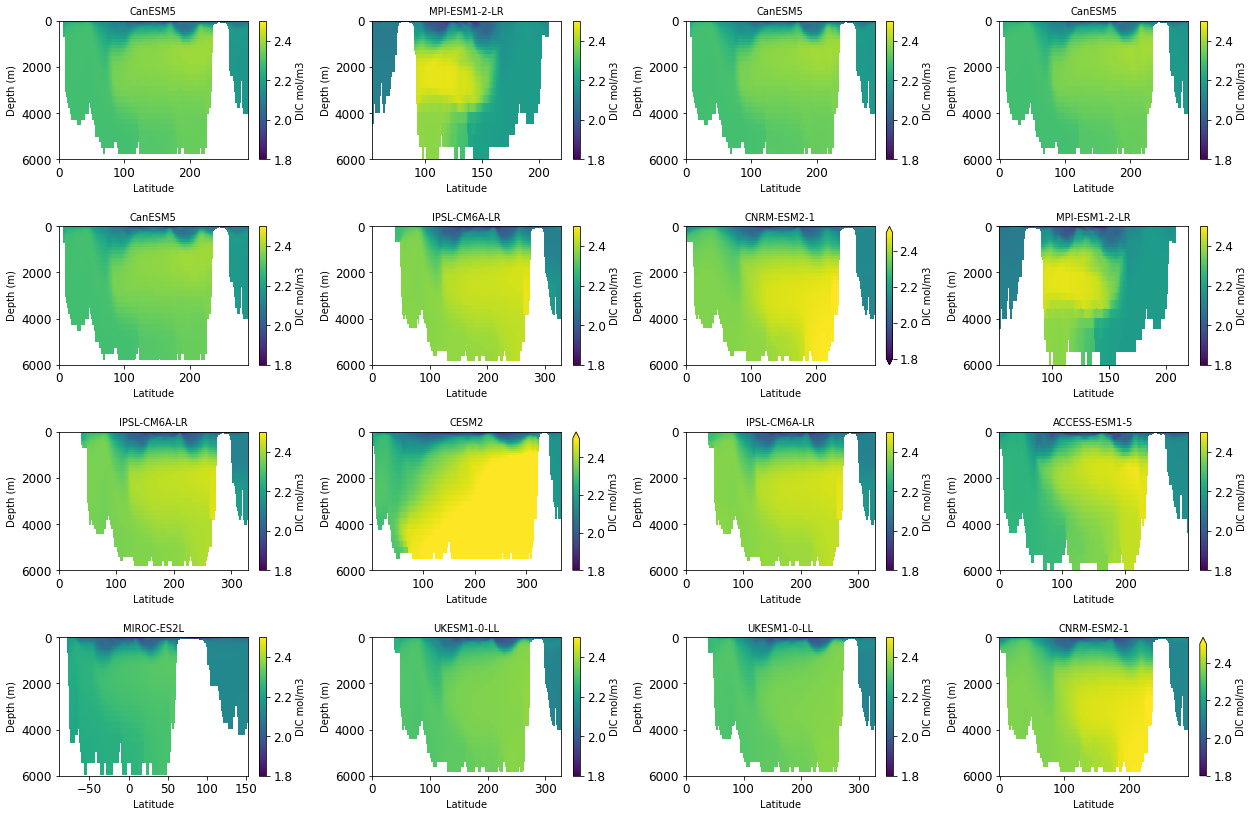

In [35]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_dissic, axarr_dissic = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_dissic.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_dissic.items():
#     print(ds)
    ax = axarr_dissic.flat[ax_idx]
    dissic_section = ds.dissic.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = dissic_section.plot(x='y', y='lev', yincrease=False, vmin = 1.8, vmax = 2.5, ax = ax, cbar_kwargs={'label':'DIC mol/m3'})
    ax.set_title(ds.attrs['source_id'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

## Talk

In [36]:
cat_talk = col.search(source_id = ['IPSL-CM6A-LR', 'CNRM-ESM2-1', 'CESM2', 'CanESM5', 'CanESM5-CanOE', 
                             'MPI-ESM-1-2-HAM', 'UKESM1-0-LL', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 
                             'CESM2-WACCM', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'MIROC-ES2L', 'ACCESS-ESM1-5',
                             'CESM2-WACCM-FV2', 'CESM2-FV2'], variable_id= 'talk', experiment_id= 'historical', table_id = 'Omon', grid_label = 'gn')
dd_talk_og = cat_talk.to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

dd_talk = combine_datasets(
    dd_talk_og,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


IndexError: index 16 is out of bounds for axis 0 with size 16

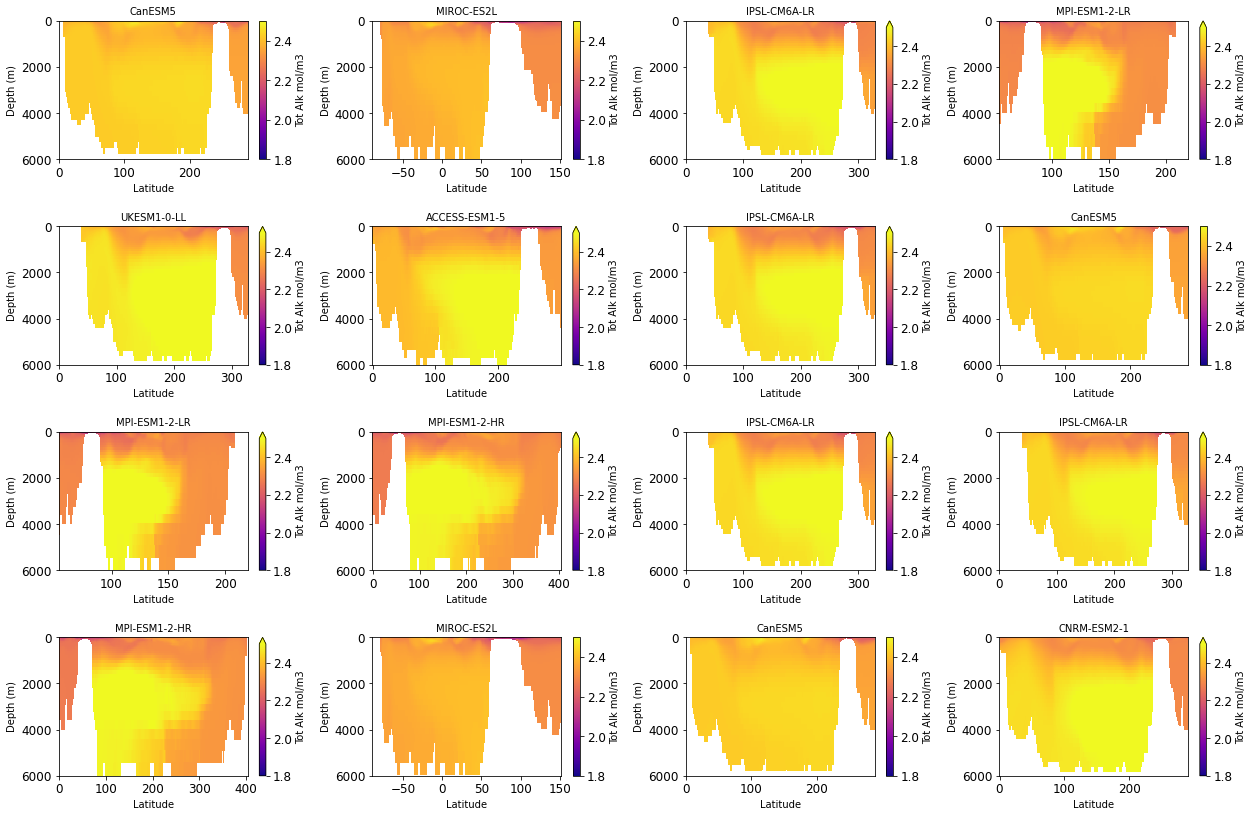

In [38]:
#You dont have to spell out all the axes, you can just keep them in an array
fig_talk, axarr_talk = plt.subplots(nrows = 4, ncols = 4, figsize=[18,12])
fig_talk.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd_talk_og.items():
#     print(ds)
    ax = axarr_talk.flat[ax_idx]
    talk_section = ds.talk.where(np.logical_and(ds.lon<=200, ds.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = talk_section.plot(x='y', y='lev', yincrease=False, vmin = 1.8, vmax = 2.5, cmap = 'plasma', ax = ax, cbar_kwargs={'label':'Tot Alk mol/m3'})
    ax.set_title(ds.attrs['source_id'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
#    #advance the axis index
    ax_idx += 1 # this is a nifty python trick to increment a variable by one